In [ ]:
# !pip install scikit-fuzzy

In [1]:
# import skfuzzy as fuzz
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss, TomekLinks, RandomUnderSampler
from sklearn.metrics import roc_curve,precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

import os
import numpy as np
import pandas as pd

In [2]:
concat_features_train = pd.read_csv('/kaggle/input/vin-feature/features_train_efficientnet_b0.csv')
concat_features_test = pd.read_csv('/kaggle/input/vin-feature/features_test_efficientnet_b0.csv')

concat_features_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279,label,view_position,laterality,study_id
0,-0.101210,-0.174239,0.121421,-0.141098,-0.277888,-0.186682,-0.140499,-0.067732,-0.111569,-0.269176,...,-0.222828,-0.064095,-0.136021,-0.272657,-0.107069,-0.214873,0,CC,L,b8d273e8601f348d3664778dae0e7e0b
1,-0.193195,-0.126949,0.458051,-0.125664,-0.203325,-0.251974,-0.043741,-0.092920,-0.040547,-0.110238,...,-0.261152,0.777141,-0.277788,0.419119,-0.137479,-0.125389,0,MLO,L,b8d273e8601f348d3664778dae0e7e0b
2,-0.058023,-0.144134,0.043329,-0.205208,-0.277090,-0.239452,-0.136032,-0.068292,-0.111630,-0.277913,...,-0.277510,0.105668,-0.129591,-0.275562,-0.072403,-0.254105,0,CC,R,b8d273e8601f348d3664778dae0e7e0b
3,0.256191,-0.126286,1.978057,-0.013343,-0.111430,-0.165095,-0.009985,-0.198499,-0.088818,-0.018077,...,-0.278391,1.332054,-0.129526,-0.214615,-0.171379,-0.265228,0,MLO,R,b8d273e8601f348d3664778dae0e7e0b
4,-0.133359,-0.116345,-0.090174,-0.152623,-0.274790,-0.261249,-0.108648,-0.066531,-0.120386,-0.276416,...,-0.278419,-0.075878,-0.195837,-0.278457,-0.129895,-0.240056,0,CC,L,8269f5971eaca3e5d3772d1796e6bd7a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,-0.258811,-0.164959,-0.137258,-0.115478,-0.265617,-0.250546,-0.094390,-0.146150,-0.200458,-0.257736,...,-0.277809,-0.125087,-0.199674,-0.258720,-0.088474,-0.274933,0,CC,R,f2093a752e6b44df5990f5fd38c99dd2
15996,-0.107519,-0.185627,0.245910,-0.104862,-0.278052,-0.061016,-0.138582,-0.048616,-0.064193,-0.246309,...,-0.124622,0.265987,-0.130561,-0.245946,-0.106530,-0.162307,0,CC,R,b3c8969cd2accfa4dbb2aece1f7158ab
15997,-0.166349,-0.160051,-0.058604,-0.149733,-0.234989,-0.154209,-0.179032,-0.064121,-0.116352,-0.272534,...,-0.223539,0.289364,-0.229472,-0.256640,-0.103691,-0.235223,0,CC,L,b3c8969cd2accfa4dbb2aece1f7158ab
15998,0.175601,-0.186246,-0.092107,-0.041350,-0.153162,-0.177083,-0.175898,-0.087329,-0.142308,-0.256857,...,-0.273179,1.193740,-0.097256,-0.161601,-0.047568,-0.126142,0,MLO,R,b3c8969cd2accfa4dbb2aece1f7158ab


In [3]:
X_train = concat_features_train.copy().drop(['label', 'study_id', 'laterality', 'view_position'], axis=1)  # Features
y_train = np.array(concat_features_train['label']).astype(int)
X_test = concat_features_test.copy().drop(['label', 'study_id', 'laterality', 'view_position'], axis=1)  # Features
y_test = np.array(concat_features_test['label']).astype(int)

In [4]:
X_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1270,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279
0,-0.101210,-0.174239,0.121421,-0.141098,-0.277888,-0.186682,-0.140499,-0.067732,-0.111569,-0.269176,...,-0.253234,-0.198405,-0.158747,-0.241812,-0.222828,-0.064095,-0.136021,-0.272657,-0.107069,-0.214873
1,-0.193195,-0.126949,0.458051,-0.125664,-0.203325,-0.251974,-0.043741,-0.092920,-0.040547,-0.110238,...,-0.219428,-0.227731,-0.069607,-0.245696,-0.261152,0.777141,-0.277788,0.419119,-0.137479,-0.125389
2,-0.058023,-0.144134,0.043329,-0.205208,-0.277090,-0.239452,-0.136032,-0.068292,-0.111630,-0.277913,...,-0.239319,-0.223053,-0.148923,-0.209120,-0.277510,0.105668,-0.129591,-0.275562,-0.072403,-0.254105
3,0.256191,-0.126286,1.978057,-0.013343,-0.111430,-0.165095,-0.009985,-0.198499,-0.088818,-0.018077,...,-0.066708,-0.267062,-0.045241,0.110348,-0.278391,1.332054,-0.129526,-0.214615,-0.171379,-0.265228
4,-0.133359,-0.116345,-0.090174,-0.152623,-0.274790,-0.261249,-0.108648,-0.066531,-0.120386,-0.276416,...,-0.278149,-0.196139,-0.146840,-0.191412,-0.278419,-0.075878,-0.195837,-0.278457,-0.129895,-0.240056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,-0.258811,-0.164959,-0.137258,-0.115478,-0.265617,-0.250546,-0.094390,-0.146150,-0.200458,-0.257736,...,-0.277201,-0.243591,-0.238032,-0.245921,-0.277809,-0.125087,-0.199674,-0.258720,-0.088474,-0.274933
15996,-0.107519,-0.185627,0.245910,-0.104862,-0.278052,-0.061016,-0.138582,-0.048616,-0.064193,-0.246309,...,-0.230476,-0.135161,-0.128467,-0.103914,-0.124622,0.265987,-0.130561,-0.245946,-0.106530,-0.162307
15997,-0.166349,-0.160051,-0.058604,-0.149733,-0.234989,-0.154209,-0.179032,-0.064121,-0.116352,-0.272534,...,-0.246644,-0.125457,-0.169513,-0.246406,-0.223539,0.289364,-0.229472,-0.256640,-0.103691,-0.235223
15998,0.175601,-0.186246,-0.092107,-0.041350,-0.153162,-0.177083,-0.175898,-0.087329,-0.142308,-0.256857,...,-0.251418,-0.125756,-0.156107,-0.262996,-0.273179,1.193740,-0.097256,-0.161601,-0.047568,-0.126142


In [5]:
# Define the SMOTETomek resampling technique
smote_tomek = SMOTETomek(sampling_strategy=1.0,
                         random_state=42)

# Resample the training data using SMOTETomek
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

In [6]:
print('Samples in class 0:', sum(y_resampled == 0))
print('Samples in class 1:', sum(y_resampled == 1))

Samples in class 0: 14463
Samples in class 1: 14463


In [7]:
num_select_feature = int(X_train.shape[1]*0.02)
mi_selector = SelectKBest(mutual_info_classif, k=num_select_feature)

# Transform the data
X_selected = mi_selector.fit_transform(X_resampled, y_resampled)

In [8]:
X_selected.shape

(28926, 25)

In [9]:
X_train_full = X_selected
y_train_full = y_resampled

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)

### Classifier

In [10]:
def get_models():
    models = list()
    models.append(('lr', LogisticRegression(max_iter=10000)))
    
    models.append(('rf', RandomForestClassifier(random_state=42,
                                                n_estimators=300)))
    
    models.append(('knn', KNeighborsClassifier(n_neighbors=5, 
                                               metric='minkowski',
                                               weights='distance', p=2)))
    return models


# evaluate each base model
def evaluate_models(models, X_train, X_val, y_train, y_val):
    # fit and evaluate the models
    scores = list()
    for name, model in models:
        # fit the model
        model.fit(X_train, y_train)
        # evaluate the model
        yhat = model.predict(X_val)
        auc = roc_auc_score(y_val, yhat)
#         f1 = f1_score(y_val, yhat, average='macro')
        # store the performance
        scores.append(auc)
        # report model performance
    return scores

In [11]:
models = get_models()
# fit and evaluate each model
scores = evaluate_models(models, X_train, X_val, y_train, y_val)
scores

[0.5484574280268952, 0.9041403442782051, 0.7545883500457204]

In [12]:
# create the ensemble
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)
# fit the ensemble on the training dataset
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=10000)),
                             ('rf',
                              RandomForestClassifier(n_estimators=300,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier(weights='distance'))],
                 voting='soft',
                 weights=[0.5484574280268952, 0.9041403442782051,
                          0.7545883500457204])

### Get predictions

In [13]:
# # Transform the data
X_test_selected = mi_selector.fit_transform(X_test, y_test)

# Predict on the test set
y_pred = ensemble.predict(X_test_selected)
print(y_pred)

[0 0 0 ... 0 0 0]


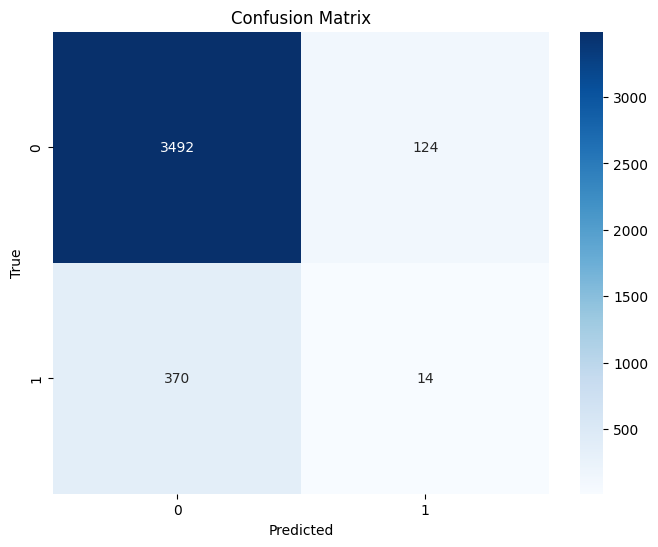

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3616
           1       0.10      0.04      0.05       384

    accuracy                           0.88      4000
   macro avg       0.50      0.50      0.49      4000
weighted avg       0.83      0.88      0.85      4000



In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, normalize=None)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, fmt="d", annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate classification report
report = classification_report(y_test, y_pred)
print(report)

In [15]:
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='macro')
test_recall = recall_score(y_test, y_pred, average='macro')
test_f1 = f1_score(y_test, y_pred, average='macro')
test_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", test_accuracy)
print('Precison:', test_precision)
print('Recall:', test_recall)
print('F1 Score:', test_f1)
print('AUC:', test_auc)

Accuracy: 0.8765
Precison: 0.502821996562568
Recall: 0.5010831489675516
F1 Score: 0.49378970138715966
AUC: 0.5010831489675516
